In [42]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as c
import scipy.fftpack as fft
import scipy.ndimage as ndi
import scipy as sp
from PIL import Image

def px_remove(array, x, y):
    temp = array
    temp[y,x]=(temp[y+1,x]+temp[y-1,x]+temp[y,x+1]+temp[y,x-1])/4
    return temp

def px_remove_edge(array, x, y):
    temp = array
    temp[y,x]=(temp[y+1,x]+temp[y-1,x]+temp[y,x-1])/3
    return temp

# Load Increasing Field Data

In [43]:
# Overview image

pos_im = Image.open("STXM_Data/SkS_Together_Field_sweep_up/TIF_Data/twotube_overview_pos.tif")
neg_im = Image.open("STXM_Data/SkS_Together_Field_sweep_up/TIF_Data/twotube_overview_neg.tif")

pos =np.array(pos_im)
neg =np.array(neg_im)

pos = np.rot90(pos)
neg = np.rot90(neg)

final = pos/neg
UP_wide = np.fliplr(final)

UP_wide = px_remove(UP_wide,80,18)
UP_wide = px_remove(UP_wide,80,19)
UP_wide = px_remove(UP_wide,80,20)
UP_wide = px_remove(UP_wide,80,18)
UP_wide = px_remove(UP_wide,80,19)

/var/folders/gl/y5z38x5d35n864qlp7vb6sx80000gp/T/ipykernel_12139/946111077.py:12: RuntimeWarning: divide by zero encountered in true_divide
  final = pos/neg


In [44]:
%matplotlib notebook

fields = ['65','70','75','80','85','90','95','100','110',]

UP_list = []

for i in np.arange(0,len(fields),1):
    pos_im = Image.open("STXM_Data/SkS_Together_Field_sweep_up/TIF_Data/up_"+fields[i]+"mT_pos.tif")
    neg_im = Image.open("STXM_Data/SkS_Together_Field_sweep_up/TIF_Data/up_"+fields[i]+"mT_neg.tif")
    pos =np.array(pos_im)
    neg =np.array(neg_im)

    pos = np.rot90(pos)
    neg = np.rot90(neg)

    final = pos/neg
    final = np.fliplr(final)
    if i==3:
        final = px_remove(final, 20,14)
        
    im=Image.fromarray(final)
    #im.save("field_sweep_images/FS_up_"+str(i)+".tiff")
    UP_list.append(final)

/var/folders/gl/y5z38x5d35n864qlp7vb6sx80000gp/T/ipykernel_12139/4042086578.py:16: RuntimeWarning: divide by zero encountered in true_divide
  final = pos/neg


<IPython.core.display.Javascript object>


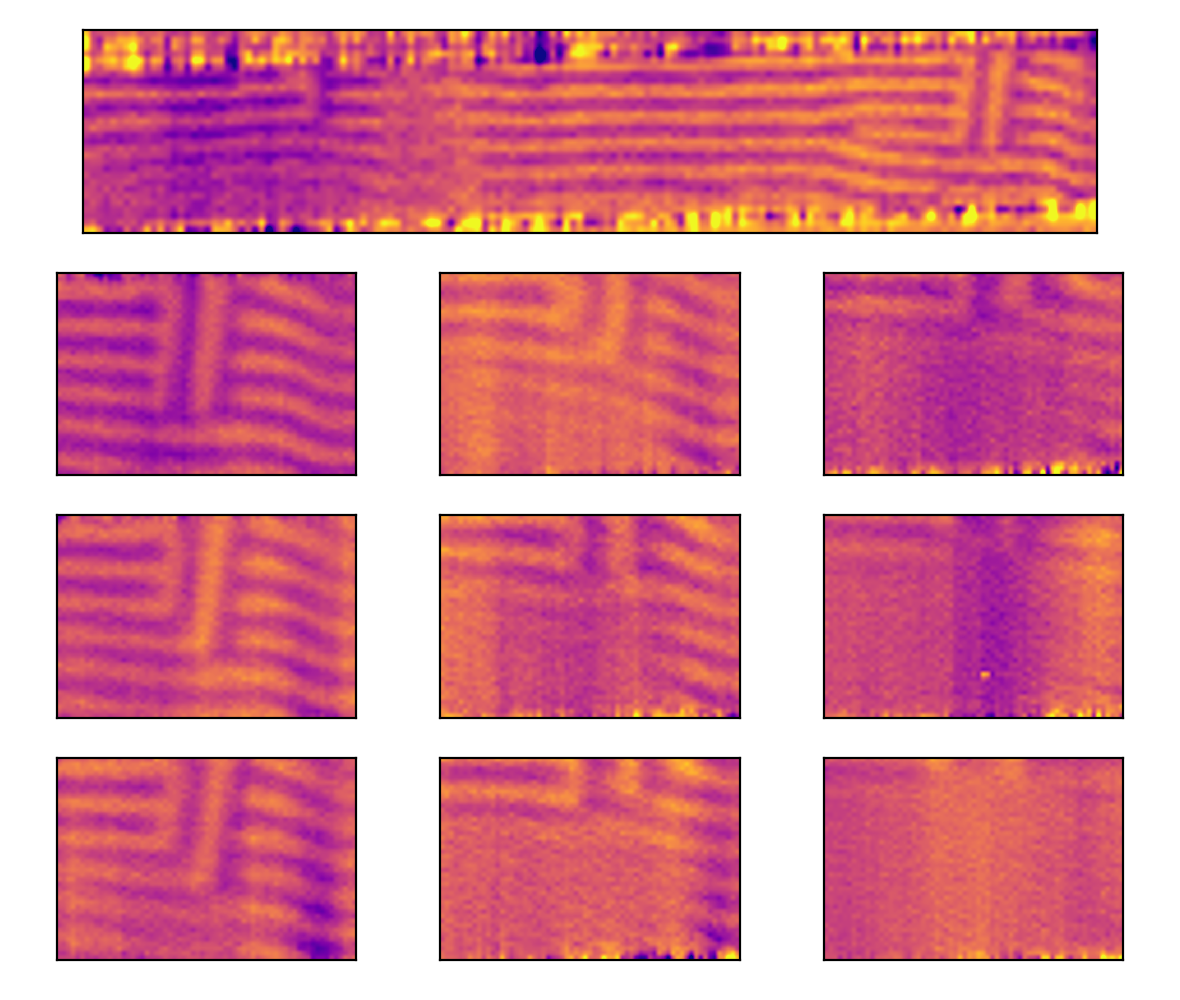

In [45]:
%matplotlib notebook
plt.figure(figsize=(5.9,5))

ax1=plt.subplot2grid((4,3),(0,0), rowspan=1,colspan=3)
plt.imshow(UP_wide[2:-5,30:-5],cmap='plasma',interpolation='hamming',vmin=0.9,vmax=1.03)
plt.xticks([])
plt.yticks([])
#plt.colorbar()

ax1=plt.subplot2grid((4,3),(1,0), rowspan=1,colspan=1)
plt.imshow(UP_list[0][12:-11,1:-1],cmap='plasma',interpolation='hamming',vmin=0.9,vmax=1.1)
plt.xticks([])
plt.yticks([])
#plt.colorbar()

ax1=plt.subplot2grid((4,3),(2,0), rowspan=1,colspan=1)
plt.imshow(UP_list[1][12:-11,1:-1],cmap='plasma',interpolation='hamming',vmin=0.9,vmax=1.1)
plt.xticks([])
plt.yticks([])
#plt.colorbar()

ax1=plt.subplot2grid((4,3),(3,0), rowspan=1,colspan=1)
plt.imshow(UP_list[2][12:-11,0:-2],cmap='plasma',interpolation='hamming',vmin=0.92,vmax=1.1)
plt.xticks([])
plt.yticks([])
#plt.colorbar()

ax1=plt.subplot2grid((4,3),(1,1), rowspan=1,colspan=1)
plt.imshow(UP_list[3][12:-11,1:-1],cmap='plasma',interpolation='hamming',vmin=0.9,vmax=1.08)
plt.xticks([])
plt.yticks([])
#plt.colorbar()

ax1=plt.subplot2grid((4,3),(2,1), rowspan=1,colspan=1)
plt.imshow(UP_list[4][12:-11,1:-1],cmap='plasma',interpolation='hamming',vmin=0.92,vmax=1.06)
plt.xticks([])
plt.yticks([])
#plt.colorbar()

ax1=plt.subplot2grid((4,3),(3,1), rowspan=1,colspan=1)
plt.imshow(UP_list[5][12:-11,1:-1],cmap='plasma',interpolation='hamming',vmin=0.92,vmax=1.06)
plt.xticks([])
plt.yticks([])
#plt.colorbar()

ax1=plt.subplot2grid((4,3),(1,2), rowspan=1,colspan=1)
plt.imshow(UP_list[6][12:-11,1:-1],cmap='plasma',interpolation='hamming',vmin=0.92,vmax=1.06)
plt.xticks([])
plt.yticks([])
#plt.colorbar()

ax1=plt.subplot2grid((4,3),(2,2), rowspan=1,colspan=1)
plt.imshow(UP_list[7][12:-11,0:-2],cmap='plasma',interpolation='hamming',vmin=0.9,vmax=1.06)
plt.xticks([])
plt.yticks([])
#plt.colorbar()

ax1=plt.subplot2grid((4,3),(3,2), rowspan=1,colspan=1)
plt.imshow(UP_list[8][12:-11,1:-1],cmap='plasma',interpolation='hamming',vmin=0.9,vmax=1.08)
plt.xticks([])
plt.yticks([])
#plt.colorbar()

plt.tight_layout()

plt.savefig('Figure_Panels/tube_destruction_up.png',dpi=300)

# Load Decreasing Field Data

In [46]:
pos_im = Image.open("STXM_Data/SkS_Separate_Field_sweep_down/TIF_Data/septube_overview_pos.tif")
neg_im = Image.open("STXM_Data/SkS_Separate_Field_sweep_down/TIF_Data/septube_overview_neg.tif")

pos =np.array(pos_im)
neg =np.array(neg_im)

pos = np.rot90(pos)
neg = np.rot90(neg)

final = pos/neg
down_wide = np.fliplr(final)

#down_wide = px_remove(down_wide,80,18)


/var/folders/gl/y5z38x5d35n864qlp7vb6sx80000gp/T/ipykernel_12139/1180287856.py:10: RuntimeWarning: divide by zero encountered in true_divide
  final = pos/neg


In [47]:
%matplotlib notebook

fields = ['65','60','55','50','45','40','35','30','25','20','0']

down_list = []

for i in np.arange(0,len(fields),1):
    pos_im = Image.open("STXM_Data/SkS_Separate_Field_sweep_down/TIF_Data/down_"+fields[i]+"mT_pos.tif")
    neg_im = Image.open("STXM_Data/SkS_Separate_Field_sweep_down/TIF_Data/down_"+fields[i]+"mT_neg.tif")
    pos =np.array(pos_im)
    neg =np.array(neg_im)

    pos = np.rot90(pos)
    neg = np.rot90(neg)

    final = pos/neg
    final = np.fliplr(final)
    if i==3:
        final = px_remove(final, 20,14)
    im=Image.fromarray(final)
    #im.save("field_sweep_images/FS_down_"+str(i)+".tiff")
    down_list.append(final)

/var/folders/gl/y5z38x5d35n864qlp7vb6sx80000gp/T/ipykernel_12139/273298600.py:16: RuntimeWarning: divide by zero encountered in true_divide
  final = pos/neg


<IPython.core.display.Javascript object>


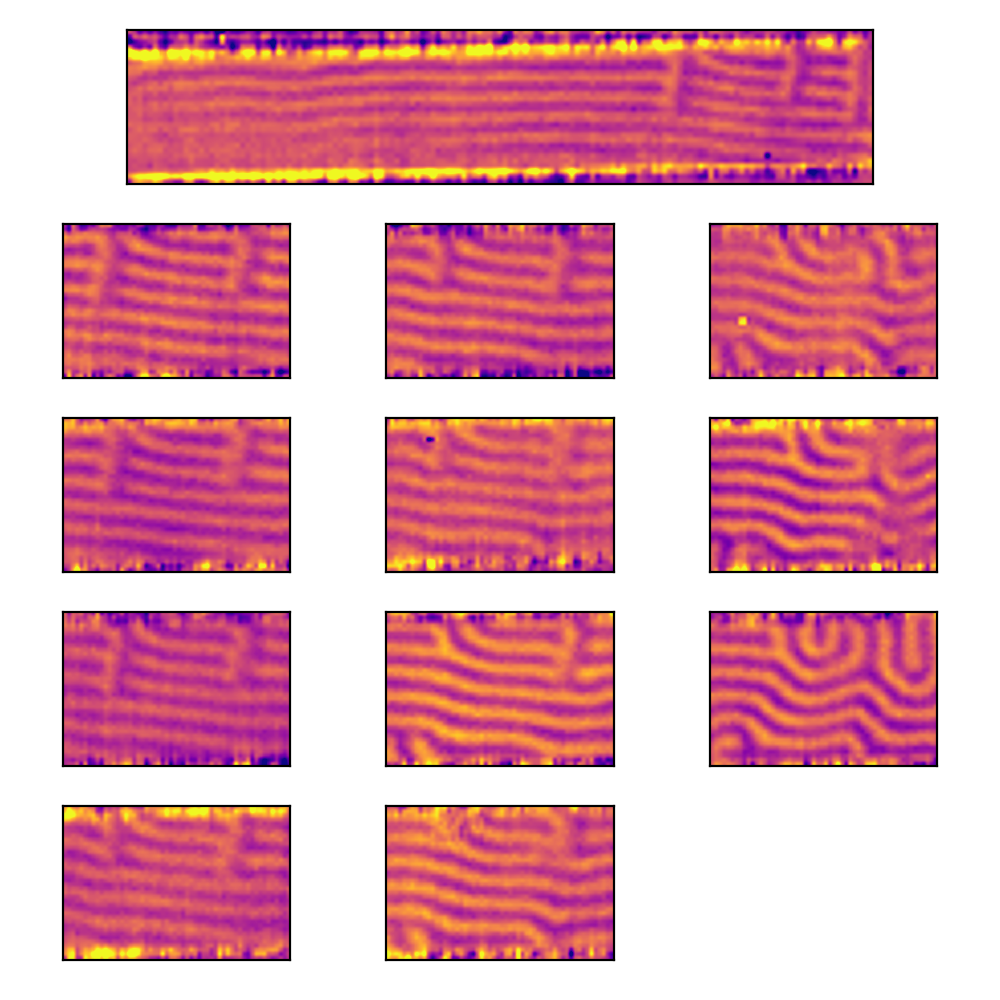

In [48]:
plt.figure(figsize=(5,5))

ax1=plt.subplot2grid((5,3),(0,0), rowspan=1,colspan=3)
plt.imshow(down_wide[2:-5,27:-13],cmap='plasma',interpolation='hamming',vmin=0.95,vmax=1.08)
plt.xticks([])
plt.yticks([])

ax1=plt.subplot2grid((5,3),(1,0), rowspan=1,colspan=1)
plt.imshow(down_list[0][8:-4,22:-22],cmap='plasma',interpolation='hamming',vmin=0.93,vmax=1.08)
plt.xticks([])
plt.yticks([])
#plt.colorbar()

ax1=plt.subplot2grid((5,3),(2,0), rowspan=1,colspan=1)
plt.imshow(down_list[1][5:-7,22:-22],cmap='plasma',interpolation='hamming',vmin=0.91,vmax=1.08)
plt.xticks([])
plt.yticks([])
#plt.colorbar()

ax1=plt.subplot2grid((5,3),(3,0), rowspan=1,colspan=1)
plt.imshow(down_list[2][1:-11,22:-22],cmap='plasma',interpolation='hamming',vmin=0.91,vmax=1.09)
plt.xticks([])
plt.yticks([])
#plt.colorbar()

ax1=plt.subplot2grid((5,3),(4,0), rowspan=1,colspan=1)
plt.imshow(down_list[3][6:-6,22:-22],cmap='plasma',interpolation='hamming',vmin=0.93,vmax=1.07)
plt.xticks([])
plt.yticks([])
#plt.colorbar()

ax1=plt.subplot2grid((5,3),(1,1), rowspan=1,colspan=1)
plt.imshow(down_list[4][5:-7,22:-22],cmap='plasma',interpolation='hamming',vmin=0.92,vmax=1.08)
plt.xticks([])
plt.yticks([])
#plt.colorbar()

ax1=plt.subplot2grid((5,3),(2,1), rowspan=1,colspan=1)
plt.imshow(down_list[5][4:-8,22:-22],cmap='plasma',interpolation='hamming',vmin=0.92,vmax=1.08)
plt.xticks([])
plt.yticks([])
#plt.colorbar()

ax1=plt.subplot2grid((5,3),(3,1), rowspan=1,colspan=1)
plt.imshow(down_list[6][7:-5,22:-22],cmap='plasma',interpolation='hamming',vmin=0.92,vmax=1.08)
plt.xticks([])
plt.yticks([])
#plt.colorbar()

ax1=plt.subplot2grid((5,3),(4,1), rowspan=1,colspan=1)
plt.imshow(down_list[7][6:-6,22:-22],cmap='plasma',interpolation='hamming',vmin=0.92,vmax=1.08)
plt.xticks([])
plt.yticks([])
#plt.colorbar()

ax1=plt.subplot2grid((5,3),(1,2), rowspan=1,colspan=1)
plt.imshow(down_list[8][4:-8,22:-22],cmap='plasma',interpolation='hamming',vmin=0.92,vmax=1.08)
plt.xticks([])
plt.yticks([])
#plt.colorbar()

ax1=plt.subplot2grid((5,3),(2,2), rowspan=1,colspan=1)
plt.imshow(down_list[9][8:-4,22:-22],cmap='plasma',interpolation='hamming',vmin=0.92,vmax=1.07)
plt.xticks([])
plt.yticks([])
#plt.colorbar()

ax1=plt.subplot2grid((5,3),(3,2), rowspan=1,colspan=1)
plt.imshow(down_list[10][6:-6,22:-22],cmap='plasma',interpolation='hamming',vmin=0.91,vmax=1.08)
plt.xticks([])
plt.yticks([])
#plt.colorbar()

plt.tight_layout()

plt.savefig('Figure_Panels/tube_destruction_down.png',dpi=300)

# Extended Data Figure

<IPython.core.display.Javascript object>


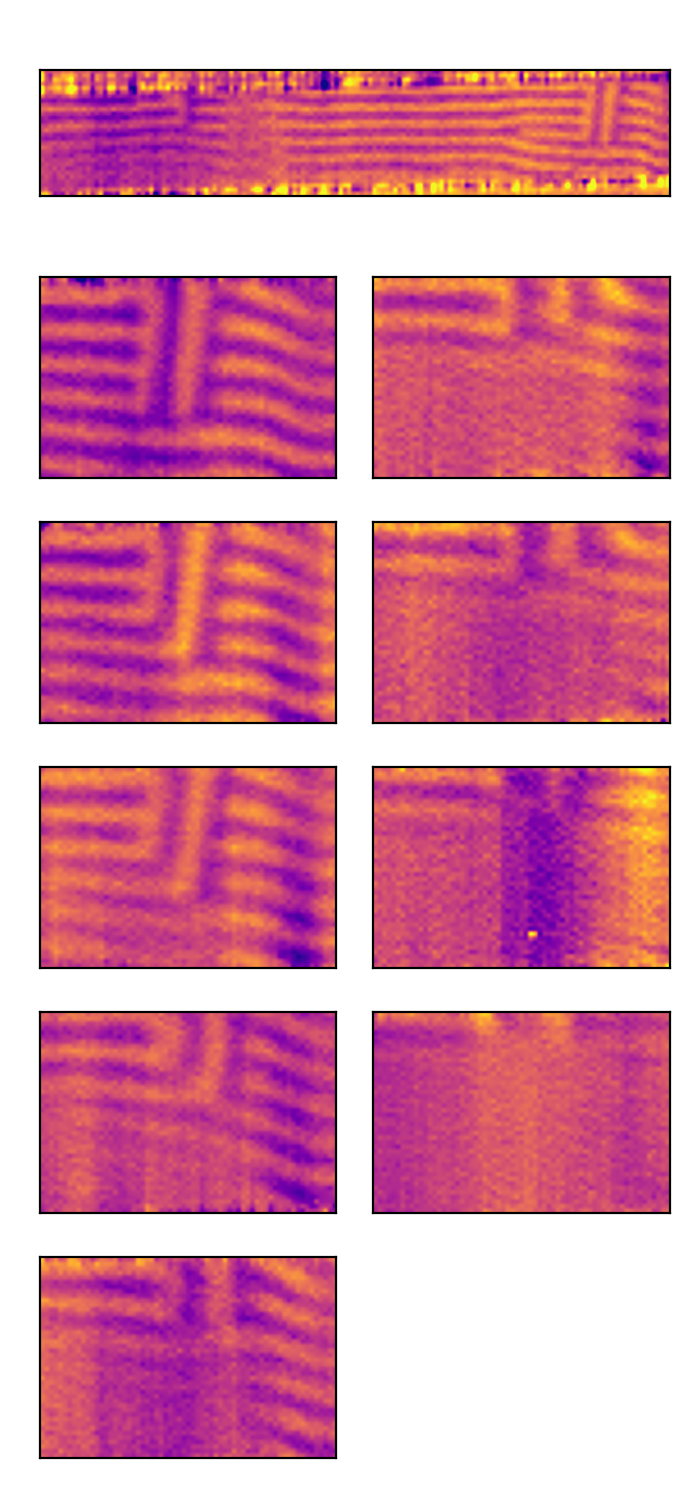

In [49]:
%matplotlib notebook
plt.figure(figsize=(3.5,7.5))

ax1=plt.subplot2grid((6,2),(0,0), rowspan=1,colspan=2)
plt.imshow(UP_wide[2:-5,30:-5],cmap='plasma',interpolation='hamming',vmin=0.9,vmax=1.03)
plt.xticks([])
plt.yticks([])
#plt.colorbar()

ax1=plt.subplot2grid((6,2),(1,0), rowspan=1,colspan=1)
plt.imshow(UP_list[0][12:-11,1:-1],cmap='plasma',interpolation='hamming',vmin=0.93,vmax=1.07)
plt.xticks([])
plt.yticks([])
#plt.colorbar()

ax1=plt.subplot2grid((6,2),(2,0), rowspan=1,colspan=1)
plt.imshow(UP_list[1][12:-11,1:-1],cmap='plasma',interpolation='hamming',vmin=0.94,vmax=1.07)
plt.xticks([])
plt.yticks([])
#plt.colorbar()

ax1=plt.subplot2grid((6,2),(3,0), rowspan=1,colspan=1)
plt.imshow(UP_list[2][12:-11,0:-2],cmap='plasma',interpolation='hamming',vmin=0.94,vmax=1.08)
plt.xticks([])
plt.yticks([])
#plt.colorbar()

ax1=plt.subplot2grid((6,2),(4,0), rowspan=1,colspan=1)
plt.imshow(UP_list[3][12:-11,1:-1],cmap='plasma',interpolation='hamming',vmin=0.94,vmax=1.08)
plt.xticks([])
plt.yticks([])
#plt.colorbar()

ax1=plt.subplot2grid((6,2),(5,0), rowspan=1,colspan=1)
plt.imshow(UP_list[4][10:-13,1:-1],cmap='plasma',interpolation='hamming',vmin=0.94,vmax=1.06)
plt.xticks([])
plt.yticks([])
#plt.colorbar()

ax1=plt.subplot2grid((6,2),(1,1), rowspan=1,colspan=1)
plt.imshow(UP_list[5][10:-13,1:-1],cmap='plasma',interpolation='hamming',vmin=0.94,vmax=1.05)
plt.xticks([])
plt.yticks([])
#plt.colorbar()

ax1=plt.subplot2grid((6,2),(2,1), rowspan=1,colspan=1)
plt.imshow(UP_list[6][10:-13,1:-1],cmap='plasma',interpolation='hamming',vmin=0.93,vmax=1.04)
plt.xticks([])
plt.yticks([])
#plt.colorbar()

ax1=plt.subplot2grid((6,2),(3,1), rowspan=1,colspan=1)
plt.imshow(UP_list[7][10:-13,0:-2],cmap='plasma',interpolation='hamming',vmin=0.93,vmax=1.03)
plt.xticks([])
plt.yticks([])
#plt.colorbar()

ax1=plt.subplot2grid((6,2),(4,1), rowspan=1,colspan=1)
plt.imshow(UP_list[8][10:-13,1:-1],cmap='plasma',interpolation='hamming',vmin=0.93,vmax=1.07)
plt.xticks([])
plt.yticks([])
#plt.colorbar()

plt.tight_layout()

plt.savefig('Figure_Panels/Extended_Data-SkS_Sweep_up.png',dpi=300)

<IPython.core.display.Javascript object>


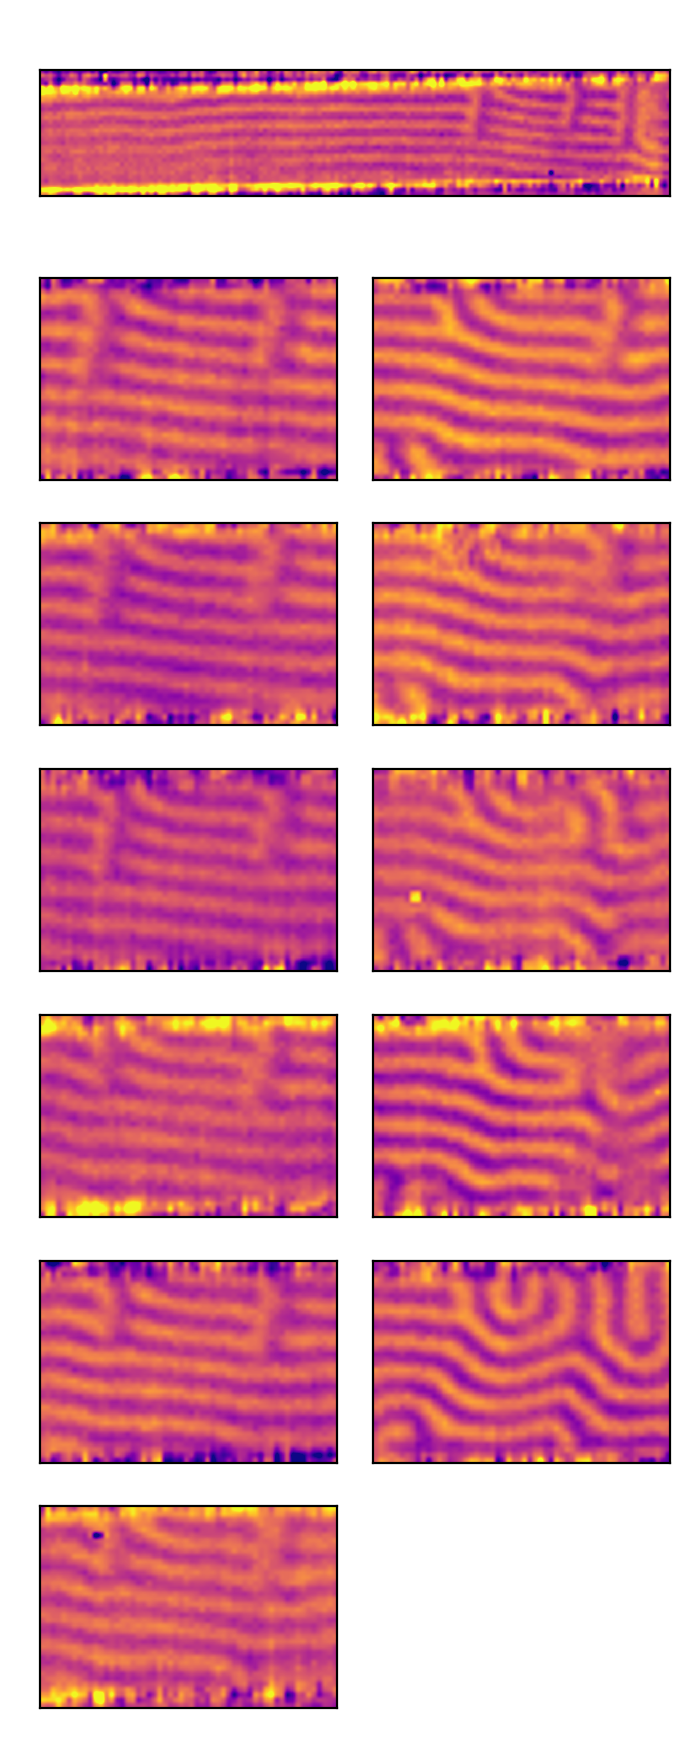

In [50]:
plt.figure(figsize=(3.5,8.75))

ax1=plt.subplot2grid((7,2),(0,0), rowspan=1,colspan=2)
plt.imshow(down_wide[2:-5,30:-5],cmap='plasma',interpolation='hamming',vmin=0.95,vmax=1.08)
plt.xticks([])
plt.yticks([])

ax1=plt.subplot2grid((7,2),(1,0), rowspan=1,colspan=1)
plt.imshow(down_list[0][8:-4,22:-22],cmap='plasma',interpolation='hamming',vmin=0.93,vmax=1.08)
plt.xticks([])
plt.yticks([])
#plt.colorbar()

ax1=plt.subplot2grid((7,2),(2,0), rowspan=1,colspan=1)
plt.imshow(down_list[1][5:-7,22:-22],cmap='plasma',interpolation='hamming',vmin=0.91,vmax=1.08)
plt.xticks([])
plt.yticks([])
#plt.colorbar()

ax1=plt.subplot2grid((7,2),(3,0), rowspan=1,colspan=1)
plt.imshow(down_list[2][1:-11,22:-22],cmap='plasma',interpolation='hamming',vmin=0.91,vmax=1.09)
plt.xticks([])
plt.yticks([])
#plt.colorbar()

ax1=plt.subplot2grid((7,2),(4,0), rowspan=1,colspan=1)
plt.imshow(down_list[3][6:-6,22:-22],cmap='plasma',interpolation='hamming',vmin=0.93,vmax=1.07)
plt.xticks([])
plt.yticks([])
#plt.colorbar()

ax1=plt.subplot2grid((7,2),(5,0), rowspan=1,colspan=1)
plt.imshow(down_list[4][5:-7,22:-22],cmap='plasma',interpolation='hamming',vmin=0.92,vmax=1.08)
plt.xticks([])
plt.yticks([])
#plt.colorbar()

ax1=plt.subplot2grid((7,2),(6,0), rowspan=1,colspan=1)
plt.imshow(down_list[5][4:-8,22:-22],cmap='plasma',interpolation='hamming',vmin=0.92,vmax=1.08)
plt.xticks([])
plt.yticks([])
#plt.colorbar()

ax1=plt.subplot2grid((7,2),(1,1), rowspan=1,colspan=1)
plt.imshow(down_list[6][7:-5,22:-22],cmap='plasma',interpolation='hamming',vmin=0.92,vmax=1.08)
plt.xticks([])
plt.yticks([])
#plt.colorbar()

ax1=plt.subplot2grid((7,2),(2,1), rowspan=1,colspan=1)
plt.imshow(down_list[7][6:-6,22:-22],cmap='plasma',interpolation='hamming',vmin=0.92,vmax=1.08)
plt.xticks([])
plt.yticks([])
#plt.colorbar()

ax1=plt.subplot2grid((7,2),(3,1), rowspan=1,colspan=1)
plt.imshow(down_list[8][4:-8,22:-22],cmap='plasma',interpolation='hamming',vmin=0.92,vmax=1.08)
plt.xticks([])
plt.yticks([])
#plt.colorbar()

ax1=plt.subplot2grid((7,2),(4,1), rowspan=1,colspan=1)
plt.imshow(down_list[9][8:-4,22:-22],cmap='plasma',interpolation='hamming',vmin=0.92,vmax=1.07)
plt.xticks([])
plt.yticks([])
#plt.colorbar()

ax1=plt.subplot2grid((7,2),(5,1), rowspan=1,colspan=1)
plt.imshow(down_list[10][6:-6,22:-22],cmap='plasma',interpolation='hamming',vmin=0.91,vmax=1.08)
plt.xticks([])
plt.yticks([])
#plt.colorbar()

plt.tight_layout()

plt.savefig('Figure_Panels/Extended_Data-SkS_Sweep_down.png',dpi=300)

# Load Sim Increasing Field

<IPython.core.display.Javascript object>


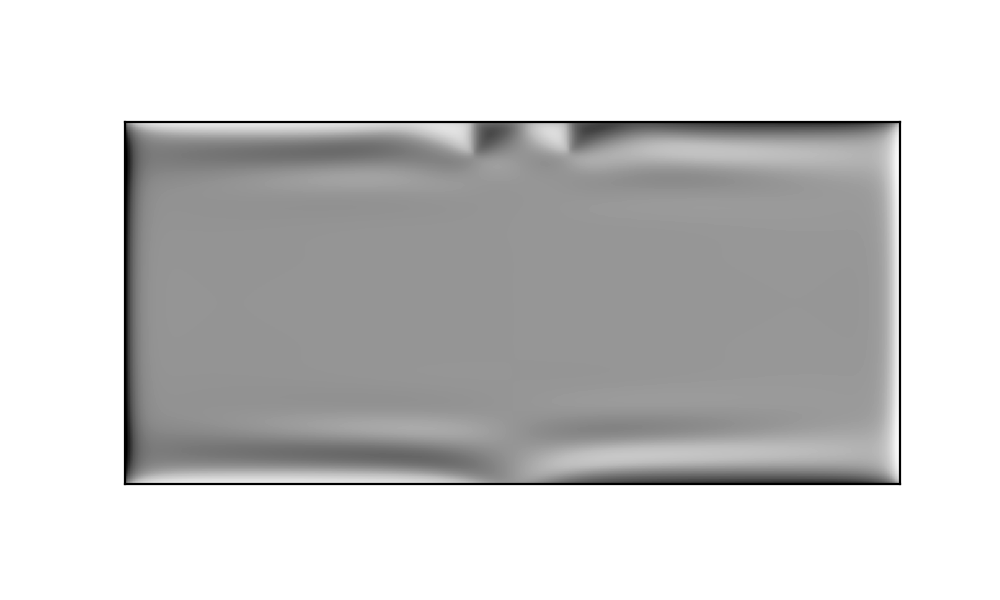

([], [])

In [51]:
### Load Sim Data ###

up_data = np.load('Plotting_Sim_Data/mz_averages_Bzs_ku_-00004_SWEEP-UP.npz')
sim_up1 = up_data['-100']
sim_up2 = up_data['-145']
sim_up3 = up_data['-155']
sim_up4 = up_data['-180']

plt.figure(figsize=(5,3))
plt.imshow(sim_up4,cmap='Greys')
plt.xticks([])
plt.yticks([])

# Load Sim Decreasing Field

<IPython.core.display.Javascript object>


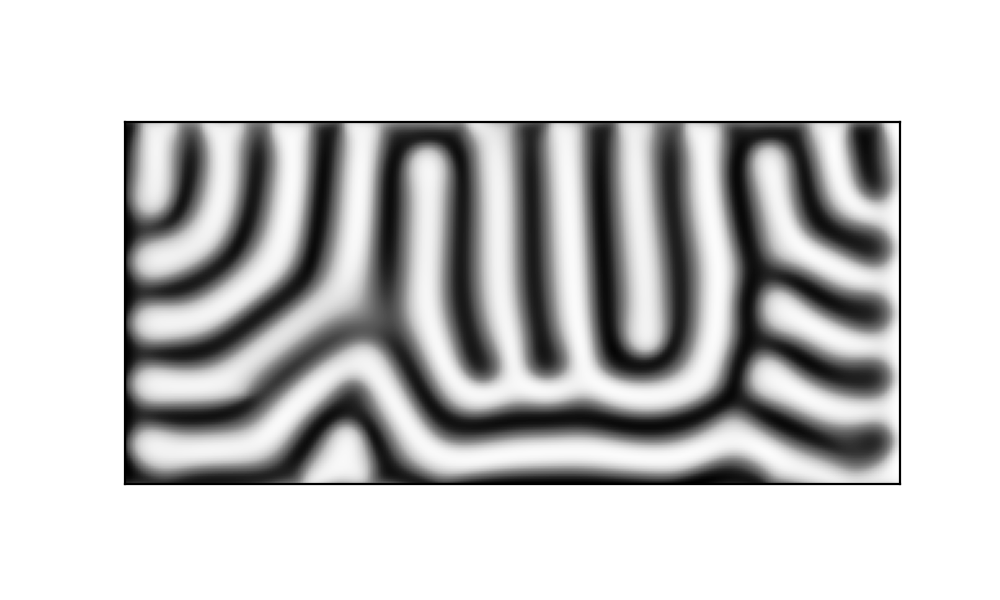

([], [])

In [52]:
down_data = np.load("Plotting_Sim_Data/mz_averages_Bzs_ku_-00004_SWEEP-DOWN.npz")
sim_down=[]
sim_down.append(down_data['-65'])
sim_down.append(down_data['-50'])
sim_down.append(down_data['-40'])
sim_down.append(down_data['-25'])
sim_down.append(down_data['-30'])

plt.figure(figsize=(5,3))
plt.imshow(sim_down[4],cmap='Greys')
plt.xticks([])
plt.yticks([])

# Plot Fig 2

<IPython.core.display.Javascript object>


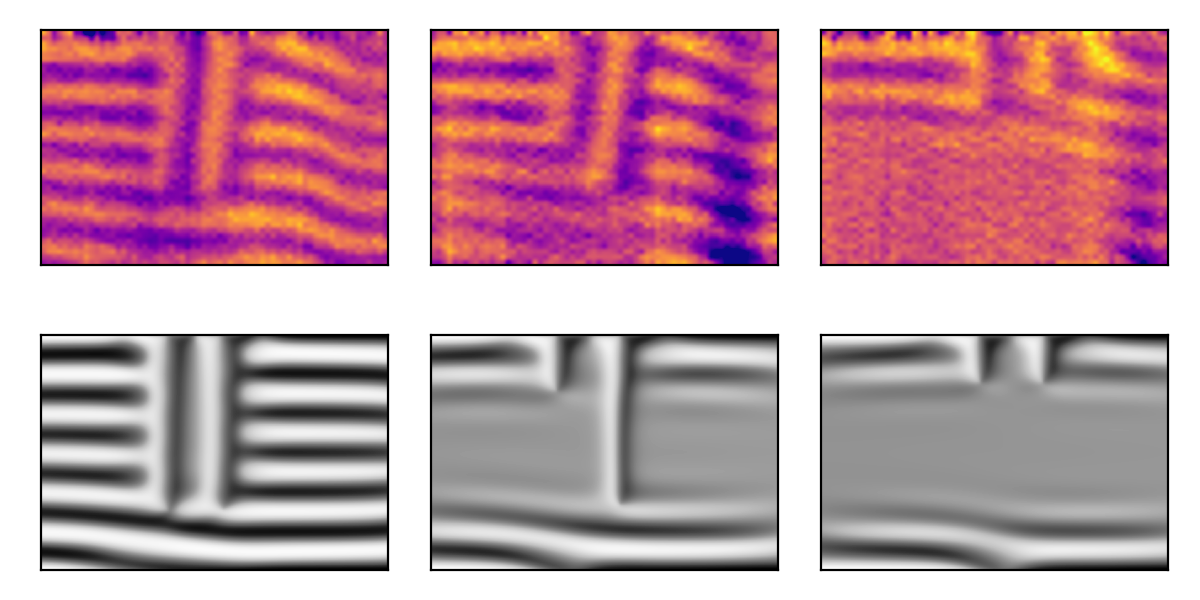

In [53]:
plt.figure(figsize=(8/4*3,3))

### Up STXM ###############
ax1=plt.subplot2grid((2,3),(0,0), rowspan=1,colspan=1)
plt.imshow(UP_list[0][12:-11,1:-1],cmap='plasma',interpolation='hamming',vmin=0.935,vmax=1.05)
plt.xticks([])
plt.yticks([])

ax1=plt.subplot2grid((2,3),(0,1), rowspan=1,colspan=1)
plt.imshow(UP_list[2][11:-12,:-2],cmap='plasma',interpolation='hamming',vmin=0.97,vmax=1.06)
plt.xticks([])
plt.yticks([])

ax1=plt.subplot2grid((2,3),(0,2), rowspan=1,colspan=1)
plt.imshow(UP_list[5][8:-15,1:-1],cmap='plasma',interpolation='hamming',vmin=0.95,vmax=1.04)
plt.xticks([])
plt.yticks([])

### Up Sims ###############
ax1=plt.subplot2grid((2,3),(1,0), rowspan=1,colspan=1)
plt.imshow(sim_up1[:,60:-33],cmap='Greys',interpolation='hamming')
plt.xticks([])
plt.yticks([])

ax1=plt.subplot2grid((2,3),(1,1), rowspan=1,colspan=1)
plt.imshow(sim_up2[:,60:-33],cmap='Greys',interpolation='hamming')
plt.xticks([])
plt.yticks([])

ax1=plt.subplot2grid((2,3),(1,2), rowspan=1,colspan=1)
plt.imshow(sim_up3[:,40:-53],cmap='Greys',interpolation='hamming')
plt.xticks([])
plt.yticks([])


############
plt.tight_layout()
plt.subplots_adjust(hspace=0.3)

plt.savefig('Figure_Panels/Fig3_STXMvsSim_up.png',dpi=300)

<IPython.core.display.Javascript object>


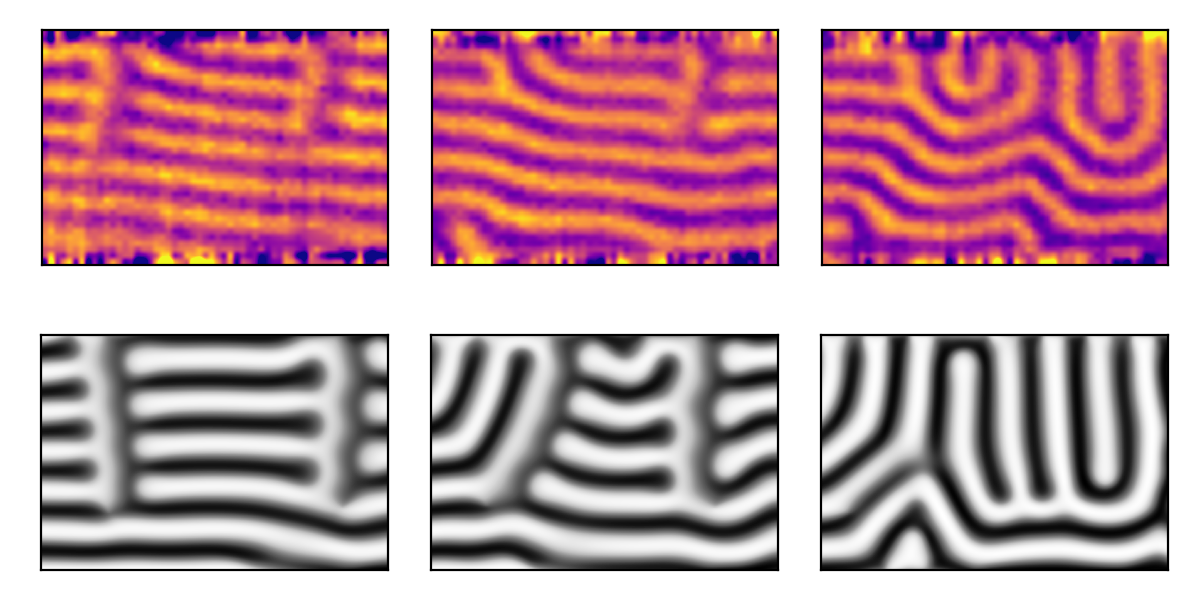

In [54]:
plt.figure(figsize=(8/4*3,3))


### Down STXM ###############
ax1=plt.subplot2grid((2,3),(0,0), rowspan=1,colspan=1)
plt.imshow(down_list[0][8:-4,22:-22],cmap='plasma',interpolation='hamming',vmin=0.96,vmax=1.05)
plt.xticks([])
plt.yticks([])

ax1=plt.subplot2grid((2,3),(0,1), rowspan=1,colspan=1)
plt.imshow(down_list[6][7:-5,25:-19],cmap='plasma',interpolation='hamming',vmin=0.95,vmax=1.07)
plt.xticks([])
plt.yticks([])

ax1=plt.subplot2grid((2,3),(0,2), rowspan=1,colspan=1)
plt.imshow(down_list[10][6:-6,25:-19],cmap='plasma',interpolation='hamming',vmin=0.94,vmax=1.06)
plt.xticks([])
plt.yticks([])

### Up Sims ###############
ax1=plt.subplot2grid((2,3),(1,0), rowspan=1,colspan=1)
plt.imshow(sim_down[0][:,32:-61],cmap='Greys',interpolation='hamming')
plt.xticks([])
plt.yticks([])

ax1=plt.subplot2grid((2,3),(1,1), rowspan=1,colspan=1)
plt.imshow(sim_down[2][:,32:-61],cmap='Greys',interpolation='hamming')
plt.xticks([])
plt.yticks([])

ax1=plt.subplot2grid((2,3),(1,2), rowspan=1,colspan=1)
plt.imshow(sim_down[3][:,32:-61],cmap='Greys',interpolation='hamming')
plt.xticks([])
plt.yticks([])

############
plt.tight_layout()
plt.subplots_adjust(hspace=0.3)

plt.savefig('Figure_Panels/Fig3_STXMvsSim_down.png',dpi=300)